<a href="https://colab.research.google.com/github/DavoodSZ1993/Pytorch_Basics/blob/main/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Useful Notes on PyTorch Module

### `torchvision.datasets` Module:

* `datasets.FashionMNIST()`: Fashion-MNIST dataset, consisting of a training set of 60,000 examples and a test set of 10,000 examples. The dataset contains 28x28 grayscale images associated with 10 classes (labels).



In [1]:
from torchvision import datasets
from IPython import display

train_data = datasets.FashionMNIST(root='../data', train=True, download=True)
val_data = datasets.FashionMNIST(root='../data', train=False, download=True)
display.clear_output()

len(train_data), len(val_data), train_data.classes

(60000,
 10000,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

### Side Note: `matplotlib.pyplot.imshow()`: 
This method displays data as an image, i.e., as a 2D regular raster. 

label:  T-shirt/top (0)


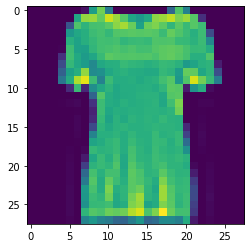

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_img(img, label):
  print('label: ', train_data.classes[label], "("+str(label)+")")
  plt.imshow(img)

show_img(*train_data[10])

### `torchvision.transforms` Module: 

Transforms are common image transformations. 

* `transforms.Compose()`: Composes several transforms together.
* `transforms.Resize()`: Resizes the input image to the given size.
* `transforms.ToTensor()`: Converts a `PIL Image ` or `numpy.ndarray` (H x W x C) to tensor (C x H x W).

In [3]:
from torchvision import transforms

trans = transforms.Compose([transforms.Resize((28, 28)),
                            transforms.ToTensor()])

train_data = datasets.FashionMNIST(root='../data', transform=trans,
                                   train=True, download=True)
val_data = datasets.FashionMNIST(root='../data', transform=trans,
                                 train=False, download=True)
display.clear_output()



### `torch.utils.data.DataLoader()`:

This class represents a Python iterable over a dataset.

In [4]:
from torch.utils.data import DataLoader

train_batch = DataLoader(train_data, batch_size=32, 
                         shuffle=True, num_workers=4)
val_batch = DataLoader(val_data, batch_size=32,
                       shuffle=False, num_workers=4)


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### `next(iter(val_batch))`:
This line of code gives a tuple which has two elements. The first element contains the inputs of the model (in this calse images (32)), and the second element contains the labels (classification) for the system. 

* `batch[:]`: Returns all the elements in the tuple (images and labels).
* `batch[:-1]`: Returns only the first element, and labels (second element) are excluded.
* `*batch[:-1]:` Returns the elements inside the tople due to the use of `*`
* `len()`: Python tuple method `len()` returns the number of elements in the tuple. This built-in method can be used to get the size of a Python list.

In [5]:
batch = next(iter(val_batch))
batch[0].shape, batch[1].shape, len(batch)

(torch.Size([32, 1, 28, 28]), torch.Size([32]), 2)

In [6]:
batch[0][0].shape

torch.Size([1, 28, 28])

In [7]:
batch[:-1][0].shape


torch.Size([32, 1, 28, 28])

### `torchvision.utils`:
This module contains various utilities, mostly for visualization.

* `torchvision.utils.make_grid()`: make a grid for images.

* `torch.permute()`: Returns a view of the original tensor input with its dimensions permuted.

* `torch.tensor.detach()`: Returns a new tensor, detached from the current graph.

* `torch.tensor()` is designed to be used in the context of gradient descent optimization. These tensors hold a tensor with numneric values (just like `np.ndarray`). In addition, they contain computational graph leading to these values. 

* When converting `torch.tensor` to `np.adarray`, we must explicitly remove the computational graph of the tensor using the `detach()` command.

images.shape:  torch.Size([32, 1, 28, 28])


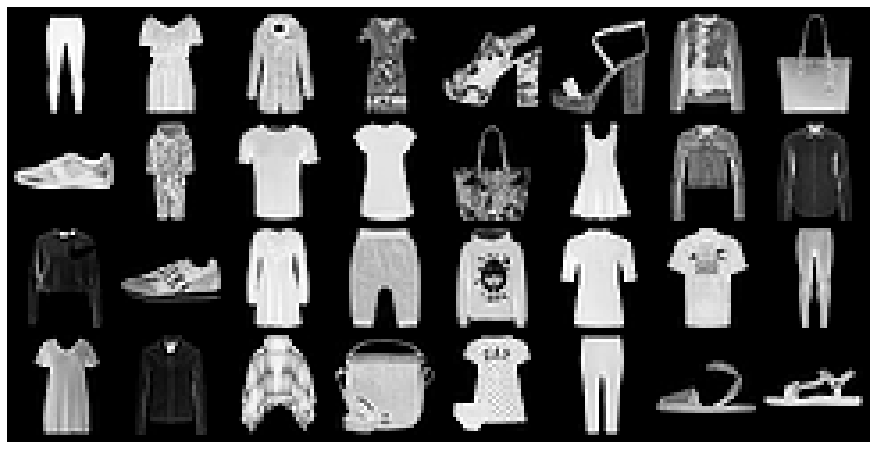

In [8]:
from torchvision.utils import make_grid

for images, _ in train_batch:
  print('images.shape: ', images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images).permute((1, 2, 0)))
  break

### Side Note: `numpy.squeeze()`:
This method is used to when we want to remove single-dimensional entries from the shape of an array.

Shape before squeezing:  torch.Size([32, 1, 28, 28])
Shape after squeezing:  torch.Size([32, 28, 28])


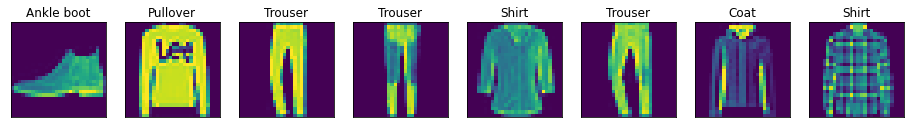

In [9]:
images, labels = next(iter(val_batch))
print('Shape before squeezing: ',images.shape)

images = images.squeeze(1)
print('Shape after squeezing: ',images.shape)

names = []
for label in labels:
  names.append(val_data.classes[label])

figsize = (16, 8)
_,axes = plt.subplots(nrows=1, ncols=8, figsize=figsize)
axes = axes.flatten()
for i, (ax, img, name) in enumerate(zip(axes, images, names)):
  img = img.detach().numpy() 
  ax.imshow(img)

  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  ax.set_title(name)

### Side Note: Python `assert` Keyword:
Assertions are assumptions embedded in the code, so that failure of these assumtions doesn't allow the code to execute further. 

In [10]:
a = 10
b = 0

print('The value of a / b is: ')
assert b!=0, 'Zero Devision Error'
print(a / b)

The value of a / b is: 


AssertionError: ignored

### Side Note: `torch.tensor.to()` and `torch.device()`

* `torch.Tensor.to()`: Performs tensor dtype (`int` to `float`) and/or device conversion (`cpu` to `gpu`).
* `torch.device` is an object representing the device on which a `torch.Tensor()` is or will be allocated.

In [11]:
import torch

tensor = torch.randn(2, 2) # Initially dtype=float32, device=cpu

tensor.to(torch.float64)

tensor([[-1.9741, -0.4403],
        [ 1.1700, -0.0908]], dtype=torch.float64)

In [12]:
cuda0 = torch.device('cuda:0')
tensor.to(cuda0)

tensor([[-1.9741, -0.4403],
        [ 1.1700, -0.0908]], device='cuda:0')

In [13]:
tensor.to(cuda0, dtype=torch.float64)

tensor([[-1.9741, -0.4403],
        [ 1.1700, -0.0908]], device='cuda:0', dtype=torch.float64)

### `torch.optim`
This is a package implementing various optimization algorithms. 

* `torch.optim.SGD()`: Implements stochasitc gradient descent

### Some Notes on Optimization in PyTorch:

* `model.train()`: Tells the model that you are training the model. This line changes the behaviour of `Dropout` and `BatchNorm` in the layers of the model.
* `model.eval()` or `model.train(mode=False)`: Tells the model that you are testing. 
* `optimizer.zero_grad()`: In PyTorch, we want to set gradients to zero before starting to update network parameters. So, in the start the gradient should be zeroed out to remove old gradients. This is done by `optimizer.zero_grad()` method. 
* `loss.backward()`: Computes `dloss/dx` for any parameter `x` which has `requires_grad=True`. These are accumulated into `x.grad` for every parameter `x`.
* `optimizer.step()`: Updates the value of `x` using gradient `x.grad`. For example, the SGD optimizer performs `x += -lr * x.grad`.
* `torch.no_grad()`: Context-manager that disable gradient calculation. `with torch.no_grad()` blaock means during these lines doing these lines without keeping track og the gradients. This method also can be sued as decorator `@torch.no_grad()`
* `\n`: next line in print command

### `torch.nn`
This module provides the basic building blocks for Neural Networks.

* `nn.Sequential()`: The Sequential holder is utilized to chain a succession of PyTorch models, for example layers of a Neural Network into a succession.
* `nn.Flatten()`: Is used to reshape any tensor with different dimensions to a single dimension so that we can do further operations on the same input data.

## References

* [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)